In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

从yfiance获取苹果公司、微软公司、特斯拉公司、亚马逊公司、谷歌公司的股票价格数据

In [2]:
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG']
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")

[*********************100%***********************]  5 of 5 completed


输出表格数据前5行

In [3]:
pd.set_option("display.max_columns",150)
data.head(5)

Price                      Adj Close                                    \
Ticker                          AAPL       AMZN       GOOG        MSFT   
Date                                                                     
2020-01-02 00:00:00+00:00  72.876122  94.900497  68.290787  153.938248   
2020-01-03 00:00:00+00:00  72.167603  93.748497  67.955666  152.021393   
2020-01-06 00:00:00+00:00  72.742645  95.143997  69.631264  152.414368   
2020-01-07 00:00:00+00:00  72.400536  95.343002  69.587814  151.024658   
2020-01-08 00:00:00+00:00  73.565186  94.598503  70.136192  153.430237   

Price                                     Close                        \
Ticker                          TSLA       AAPL       AMZN       GOOG   
Date                                                                    
2020-01-02 00:00:00+00:00  28.684000  75.087502  94.900497  68.368500   
2020-01-03 00:00:00+00:00  29.534000  74.357498  93.748497  68.032997   
2020-01-06 00:00:00+00:00  30.102667  74.949997  95.143997  69.710503   
2020-01-07 00:00:00+00:00  31.270666  74.597504  95.343002  69.667000   
2020-01-08 00:00:00+00:00  32.809334  75.797501  94.598503  70.216003   

Price                                                  High             \
Ticker                           MSFT       TSLA       AAPL       AMZN   
Date                                                                     
2020-01-02 00:00:00+00:00  160.619995  28.684000  75.150002  94.900497   
2020-01-03 00:00:00+00:00  158.619995  29.534000  75.144997  94.309998   
2020-01-06 00:00:00+00:00  159.029999  30.102667  74.989998  95.184502   
2020-01-07 00:00:00+00:00  157.580002  31.270666  75.224998  95.694504   
2020-01-08 00:00:00+00:00  160.089996  32.809334  76.110001  95.550003   

Price                                                              Low  \
Ticker                          GOOG        MSFT       TSLA       AAPL   
Date                                                                     
2020-01-02 00:00:00+00:00  68.406998  160.729996  28.713333  73.797501   
2020-01-03 00:00:00+00:00  68.625000  159.949997  30.266666  74.125000   
2020-01-06 00:00:00+00:00  69.824997  159.100006  30.104000  73.187500   
2020-01-07 00:00:00+00:00  70.149498  159.669998  31.441999  74.370003   
2020-01-08 00:00:00+00:00  70.579002  160.800003  33.232666  74.290001   

Price                                                                   \
Ticker                          AMZN       GOOG        MSFT       TSLA   
Date                                                                     
2020-01-02 00:00:00+00:00  93.207497  67.077499  158.330002  28.114000   
2020-01-03 00:00:00+00:00  93.224998  67.277199  158.059998  29.128000   
2020-01-06 00:00:00+00:00  93.000000  67.500000  156.509995  29.333332   
2020-01-07 00:00:00+00:00  94.601997  69.518997  157.320007  30.224001   
2020-01-08 00:00:00+00:00  94.321999  69.542000  157.949997  31.215334   

Price                           Open                                    \
Ticker                          AAPL       AMZN       GOOG        MSFT   
Date                                                                     
2020-01-02 00:00:00+00:00  74.059998  93.750000  67.077499  158.779999   
2020-01-03 00:00:00+00:00  74.287498  93.224998  67.392998  158.320007   
2020-01-06 00:00:00+00:00  73.447502  93.000000  67.500000  157.080002   
2020-01-07 00:00:00+00:00  74.959999  95.224998  69.897003  159.320007   
2020-01-08 00:00:00+00:00  74.290001  94.902000  69.603996  158.929993   

Price                                    Volume                                \
Ticker                          TSLA       AAPL      AMZN      GOOG      MSFT   
Date                                                                            
2020-01-02 00:00:00+00:00  28.299999  135480400  80580000  28132000  22622100   
2020-01-03 00:00:00+00:00  29.366667  146322800  75288000  23728000  21116200   
2020-01-06 00:00:00+00:00  29.364668  1183872

提取出data数据中的Adj Close，用于后续分析

In [4]:
data = data['Adj Close']
data.head()

Ticker,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2020-01-02 00:00:00+00:00,72.876122,94.900497,68.290787,153.938248,28.684000
2020-01-03 00:00:00+00:00,72.167603,93.748497,67.955666,152.021393,29.534000
2020-01-06 00:00:00+00:00,72.742645,95.143997,69.631264,152.414368,30.102667
2020-01-07 00:00:00+00:00,72.400536,95.343002,69.587814,151.024658,31.270666
2020-01-08 00:00:00+00:00,73.565186,94.598503,70.136192,153.430237,32.809334


评估清洗数据

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 00:00:00+00:00 to 2022-12-30 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    756 non-null    float64
 1   AMZN    756 non-null    float64
 2   GOOG    756 non-null    float64
 3   MSFT    756 non-null    float64
 4   TSLA    756 non-null    float64
dtypes: float64(5)
memory usage: 35.4 KB


In [6]:
data.describe()

Ticker,AAPL,AMZN,GOOG,MSFT,TSLA
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,128.081749,142.455482,104.757926,239.337976,206.365502
std,30.528397,27.856019,26.778299,47.451232,95.856975
min,54.569733,81.820000,52.770950,130.140991,24.081333
25%,113.105709,118.337875,78.330238,205.233334,138.270828
50%,133.478325,154.467499,104.644669,240.342201,223.651665
75%,148.742535,164.633247,129.096603,277.194832,276.565002
max,179.273560,186.570496,150.537689,335.105743,409.970001


数据无需清洗

计算每日收益率


In [7]:
returns=data.pct_change().dropna()

In [8]:
returns

Ticker,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2020-01-03 00:00:00+00:00,-0.009722,-0.012139,-0.004907,-0.012452,0.029633
2020-01-06 00:00:00+00:00,0.007968,0.014886,0.024657,0.002585,0.019255
2020-01-07 00:00:00+00:00,-0.004703,0.002092,-0.000624,-0.009118,0.038801
2020-01-08 00:00:00+00:00,0.016086,-0.007809,0.007880,0.015928,0.049205
2020-01-09 00:00:00+00:00,0.021241,0.004799,0.011044,0.012493,-0.021945
...,...,...,...,...,...
2022-12-23 00:00:00+00:00,-0.002798,0.017425,0.017562,0.002267,-0.017551
2022-12-27 00:00:00+00:00,-0.013879,-0.025924,-0.020933,-0.007414,-0.114089
2022-12-28 00:00:00+00:00,-0.030685,-0.014692,-0.016718,-0.010255,0.033089


### 分析

一 定义 计算投资组合的收益和风险函数

In [9]:
def portfolio_performance(weights, returns):
    '''
    :param weights: 投资组合中各个股票的权重
    :param returns: 投资组合中各个股票的日收益率
    :return:
    '''
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    return portfolio_return, portfolio_stddev

二 生成多个随机权重的投资组合，并通过portfolio_performance函数计算出投资组合的收益和风险，并把每个投资组合的结果记录在numpy数组中

In [10]:
# 设定投资组合的数量是10000个
num_portfolios = 10000

In [11]:
# 计算出这10000个随机权重的投资组合，并把结果储存在results变量中
results = np.zeros((3, num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    portfolio_return, portfolio_stddev = portfolio_performance(weights, returns)
    results[0,i] = portfolio_stddev
    results[1,i] = portfolio_return
    results[2,i] = results[1,i] / results[0,i]  # Sharpe Ratio

三 以最大夏普比率为原则，寻找最优的投资组合（找权重）

通过定义新的函数，得到负的夏普比率，从而通过最小化负的夏普比率找到最大的夏普比率

In [12]:
def negative_sharpe_ratio(weights, returns):
    portfolio_return, portfolio_stddev = portfolio_performance(weights, returns)
    return -portfolio_return / portfolio_stddev

给最小化函数minimize定义变量范围和约束条件

In [13]:
bounds = tuple((0, 1) for _ in range(len(tickers)))
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) #次数x是len(tickers)*[1./len(tickers)]代表的一个列表


调用最小化函数minimize，得到优化结果对象result，调用result.x即是找到的最优解

In [14]:
result = minimize(negative_sharpe_ratio, len(tickers)*[1./len(tickers)], args=(returns,),
                  method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = result.x
optimal_return, optimal_stddev = portfolio_performance(optimal_weights, returns)

minimize函数参数，按照顺序解释：  
1.要最小化的目标函数  
2.结果是一个[0.2,0.2,0.2,0.2]  ，是每个资产的初始权重，是算法的初始猜测值
3.给目标函数额外传参，在这里是 returns。注意要用逗号 , 来表明 args 是一个元组，即使它只有一个元素
4.method='SLSQP': 指定优化算法为 SLSQP (Sequential Least Squares Programming)，适用于处理线性等式和不等式约束的优化问题。
5.bounds=bounds: 为每个变量（即权重）设置的边界条件
6.constraints=constraints: 优化过程中需要满足 权重之和等于1 的约束条件。

四 数据可视化

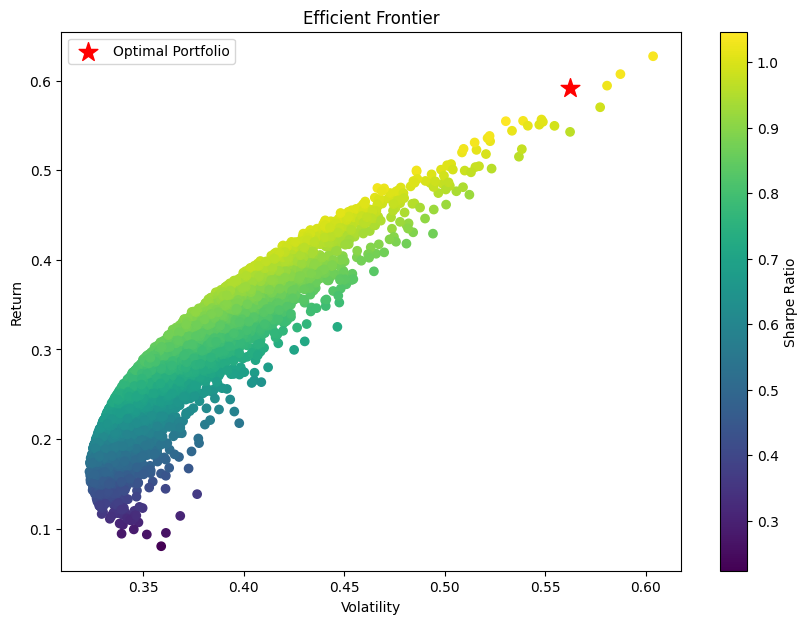

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_stddev, optimal_return, color='red', marker='*', s=200, label='Optimal Portfolio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()
plt.show()

In [18]:
np.set_printoptions(suppress=False, precision=8)
optimal_weights

array([3.18050315e-01, 4.33680869e-18, 2.51534904e-17, 2.34187669e-17,
       6.81949685e-01])

In [19]:
np.set_printoptions(suppress=True, precision=8)
optimal_weights

array([0.31805032, 0.        , 0.        , 0.        , 0.68194968])